In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('dataset/mnist_train.csv')

In [4]:
data = np.array(data)
m, n = data.shape
print(m,n)
np.random.shuffle(data)

data_test = data[0:1000].T
y_test = data_test[0]
x_test = data_test[1:]/ 255
print(y_test.shape,x_test.shape)

60000 785
(1000,) (784, 1000)


In [5]:
data_train = data[1000:].T
y_train = data_train[0]
x_train = data_train[1:]/ 255
print(y_train.shape,x_train.shape)

(59000,) (784, 59000)


In [6]:
def init_params(k,n):
    W1 = np.random.rand(k,n)  - 0.5
    b1 = np.random.rand(k,1)  - 0.5
    W2 = np.random.rand(k,k)  - 0.5
    b2 = np.random.rand(k,1)  - 0.5
    return W1,b1,W2,b2

In [7]:
def rectified_linear_unit(Z):
    return np.maximum(Z,0)

In [8]:
def relu_derivative(Z):
    # returns true(1) if Z is +ve, false(0) if 0 or -ve
    return Z > 0 

In [9]:
def softmax(Z):
    # e^zi / sum(e^zi)
    return np.exp(Z)/ sum(np.exp(Z))

In [10]:
def one_hot_encode(Y):
    # an array of zeros with size of how many training examples for rows and 10 for how many columns [one for each digit]
    one_hot_encoded = np.zeros((Y.size,Y.max()+1))
    # np.arange(Y.size) is the number of training examples for which row, and Y is the column for that specific digit 
    one_hot_encoded[np.arange(Y.size), Y] = 1
    return one_hot_encoded.T

In [11]:
def forward_propagation(W1,b1,W2,b2,X):
    A0 = X
    #calculate unactivated first layer Z1 = W1 . A0 + b1
    Z1 = W1.dot(A0) + b1
    # apply activation function Relu to Z1. A1 = Relu(Z1)
    A1 = rectified_linear_unit(Z1)
    #calculate unactivated second layer Z2 = W2. A1 + b2
    Z2 = W2.dot(A1) + b2
    # apply activation function softmax to Z2 to get the probabilities. A2 = softmax(Z2)    
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [12]:
def back_propagation(Z1,A1,A2,W2,X,Y):
    m = Y.size
    # hot encode Y
    hot_Y = one_hot_encode(Y)
    # calculate the error in 2nd layer (the prediction vs the real value)
    dZ2 = A2 - hot_Y
    # calculate derivative of the weights of 2nd layer - how much does it contribute to the error
    dW2 = (1/m) * dZ2.dot(A1.T) 
    # calculate the derivative of the bias of 2nd layer-> average of the absolute error (how much the output was off by)
    db2 = (1/m) * np.sum(dZ2)
    # calculate the error of the 1st layer based on the 2nd layer [apply weights in reverse]
    dZ1 = (W2.T).dot(dZ2) * relu_derivative(Z1) # <- undo activation function
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1)
    return dW1, db1, dW2, db2


In [13]:
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    # update W1, b1, W2, b2 based on learning rate
    return (W1 - alpha * dW1), (b1 - alpha * db1), (W2 - alpha * dW2), (b2 - alpha * db2)

In [14]:
def get_predictions(A2):
    # return the index of the maximum probability
    return np.argmax(A2,0)

In [15]:
def get_accuracy(predictions,Y):
    # sum the predictions that are equal to the real value and get % of
    return np.sum(predictions==Y) / Y.size

In [45]:
def gradient_decent(X, Y, iters, alpha):
    digits = 10
    W1,b1,W2,b2 = init_params(digits,n-1)
    plot_x = []
    plot_y = []
    for i in range(iters+1):
        Z1, A1, Z2, A2 = forward_propagation(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2 = back_propagation(Z1,A1,A2,W2,X,Y)
        W1, b1, W2, b2 =  update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i % 20 == 0:
            acc = get_accuracy(get_predictions(A2),Y)
            print('iteration #', i, ', Accuracy:', round(acc*100,2),'%')
            plot_x.append(i)
            plot_y.append(acc)
    plt.plot(plot_x,plot_y)
    plt.gca().set_xlabel('iteration#')
    plt.gca().set_ylabel('% accuracy')      
    return W1, b1, W2, b2

iteration # 0 , Accuracy: 8.89 %
iteration # 20 , Accuracy: 29.75 %
iteration # 40 , Accuracy: 45.54 %
iteration # 60 , Accuracy: 56.7 %
iteration # 80 , Accuracy: 64.0 %
iteration # 100 , Accuracy: 68.56 %
iteration # 120 , Accuracy: 71.64 %
iteration # 140 , Accuracy: 73.86 %
iteration # 160 , Accuracy: 75.44 %
iteration # 180 , Accuracy: 76.64 %
iteration # 200 , Accuracy: 77.68 %
iteration # 220 , Accuracy: 78.68 %
iteration # 240 , Accuracy: 79.44 %
iteration # 260 , Accuracy: 80.12 %
iteration # 280 , Accuracy: 80.73 %
iteration # 300 , Accuracy: 81.26 %
iteration # 320 , Accuracy: 81.73 %
iteration # 340 , Accuracy: 82.15 %
iteration # 360 , Accuracy: 82.49 %
iteration # 380 , Accuracy: 82.89 %
iteration # 400 , Accuracy: 83.23 %
iteration # 420 , Accuracy: 83.55 %
iteration # 440 , Accuracy: 83.81 %
iteration # 460 , Accuracy: 84.08 %
iteration # 480 , Accuracy: 84.34 %
iteration # 500 , Accuracy: 84.59 %


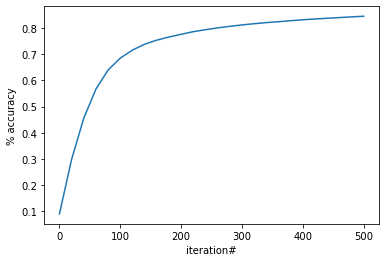

In [46]:
iters = 500
alpha = 0.1
W1, b1, W2, b2 = gradient_decent(x_train, y_train, iters, alpha)